# LIBRARIES 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import keras
import tensorflow as tf
import ast, os
import cv2

# LABELLING

# ast - abstract syntax tree - analysis tool

# literal_eval - identifying data type of the content in a file by traversing through the nodes of the tree

In [2]:
model = load_model('uv_mobilenetmodel.h5')#loading model into model parameter
f = open("mobilenet_uv_class_indices.txt", "r")#opening currency classes text file
labels = f.read()#reading the text file into labels parameter
labels = ast.literal_eval(labels)
final_labels = {v: k for k, v in labels.items()}#interchanging and printing the values as label:class instead of class:label
print(final_labels.keys()) #key values-labels for classes

dict_keys([0, 1, 2])


# 

# IMAGE PREPROCESSING - CROPPING

In [3]:
def sub(og):
    h, w, c = og.shape #height*width*channel - ex: 480,640,3
    x_start_r = 0.3125  
    x_end_r = 0.703125  
    y_start_r = 0.270833
    y_end_r = 0.791666  
    
    #np.floor-round of lowest integer value
    x = int(np.floor(x_start_r * w))#200
    y = int(np.floor(y_start_r * h))# 130
    x2 = int(np.floor(x_end_r * w))#450
    y2 = int(np.floor(y_end_r * h))# 380

    image = og[y:y2, x:x2].copy() #copying image to image parameter
    #[130:380,200:450]-croping image for considering security thread
    
    thresh = image#storing image as array values in thresh parameter
    return thresh


# PREDICTING IMAGE

# load_img-loads image into PIL(Python Imaging Library) format-provides the python interpreter with image editing capabilities.

# asarray-converts input to array-returns an array

# np.expand_dims-expand shape of an array

# result_dict[final_labels[key]] = result[0][key] - mapping every value of result array to the classes in final_label dictionary (final_labels[key]-gives values of respective keys from dictionary)

# dict.items()-returns tuple of key value pairs

# sorted() -used to sort dictionary

# key - supports a inline function-here it returns item[1] as item which in this case probability values beside every class name({class-items[0]:prob-items[1]})

# based on item[1] the dictionary is sorted with reverse =true which is in descending order

# sorted_results.keys()-key values(class names) of sorted_result dict

# sorted_results[list(sorted_results.keys())[0]] - retriving the value of the first element in the list which contains key values

1/1 [==============================] - 1s 1s/step
UV note type:  dashed


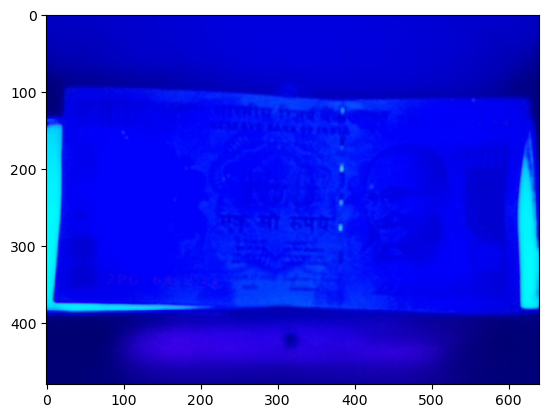

In [4]:
def predict_image(imgname, from_test_dir):
    
    test_image = keras.utils.load_img(imgname)
    plt.imshow(test_image) #display picture
    
    test_image = np.asarray(test_image)
    test_image = np.asarray(sub(test_image))#cropping the image
    #axis increase number of dimensions of array-axis=0-vertically-rows
    test_image = np.expand_dims(test_image, axis=0)
    test_image = (2.0 / 255.0) * test_image - 1.0 #normalizing the values of images
    
    #passing the normalized image to our model for prediction
    result = model.predict(test_image)

    result_dict = dict()#creating a dictionary
    for key in list(final_labels.keys()):#each keys of final labels dict
        result_dict[final_labels[key]] = result[0][key]
        
    #sorting dictionary based on probability values in descending order
    sorted_results = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

    if not from_test_dir: #if False is passed
        
        #each class name from sorted dictionary
        for label in sorted_results.keys():
            
# printing each class name(key) and its value by multiplying its value to 100 to achieve probability percentage in that format 
            print("{}: {}%".format(label, sorted_results[label] * 100))
            
    final_result = dict() #creating a dictionary 
    
    #creating and mapping the 1st key value pair into new dict
    final_result[list(sorted_results.keys())[0]] = sorted_results[list(sorted_results.keys())[0]] * 100
    
    return final_result

note = predict_image('..\\test-images\\test.jpg', True)
currency=list(note.keys())[0]#retriving that class name from dictionary
print("UV note type: ", currency)

# VALIDATING BATCH-TEST DIRECTORY

# true-only prints class with highest probability
# false-prints all classes with probabilities
# calling predict image directory and returns result to prediction parameter
# prediction is returned in dictionary form hence we check key value in that dict with currency string

1/1 [==============================] - 0s 93ms/step
continuous\high-contrast100newuvback.jpg: CORRECT PREDICTION {'continuous': 99.44397211074829}
Predicted note:  continuous
Orginal note: continuous
1/1 [==============================] - 0s 95ms/step
continuous\high-contrast100newuvbackr.jpg: CORRECT PREDICTION {'continuous': 96.53294682502747}
Predicted note:  continuous
Orginal note: continuous
1/1 [==============================] - 0s 86ms/step
continuous\high-contrast2000uvback.jpg: CORRECT PREDICTION {'continuous': 98.2244074344635}
Predicted note:  continuous
Orginal note: continuous
1/1 [==============================] - 0s 92ms/step
continuous\high-contrast2000uvback1.jpg: CORRECT PREDICTION {'continuous': 99.25603866577148}
Predicted note:  continuous
Orginal note: continuous
1/1 [==============================] - 0s 91ms/step
continuous\high-contrast2000uvbackdown.jpg: CORRECT PREDICTION {'continuous': 90.77937602996826}
Predicted note:  continuous
Orginal note: continuous
1

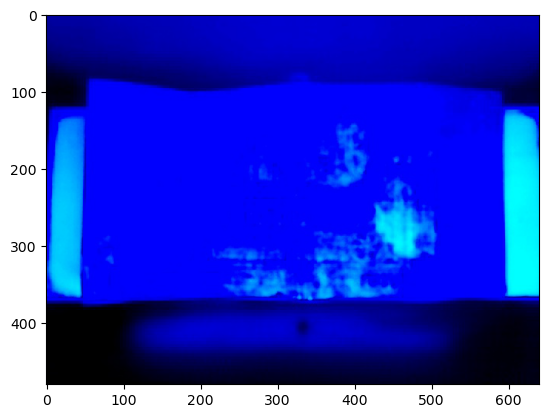

In [5]:
def verify_test_dir():
    path = '..\\batch-test-images' #path of test directory
    
    #list of all folders in test dir will be stored in folders array
    folders = os.listdir(path) 

    correct_preds = 0
    file_count = 0
    
    for fold in folders: #taking each folder into fold parameter
        
        #list of all files in the selected folder will be stored in files array
        files = os.listdir(path + '\\' + fold)
        
        #taking each name of file into filename parameter
        for filename in files:
            UV_type_string = fold #folder name 
            
            prediction = predict_image(path + '\\{}\\'.format(fold) + filename, True)
            if list(prediction.keys())[0] == UV_type_string:
                
                #filename along with its prediction probability
                print("{}\{}: CORRECT PREDICTION".format(fold, filename), prediction)
                print("Predicted note: ",list(prediction.keys())[0])#predicted note
                print("Orginal note:",UV_type_string)#orginal note
                correct_preds += 1
            else:
                print("{}\{}: INCORRECT PREDICTION".format(fold, filename), prediction)
                print("Predicted note: ",list(prediction.keys())[0])
                print("Orginal note:", UV_type_string)
            file_count += 1

    acc=(correct_preds/file_count)*100 #accuracy
    print('accuracy:',acc)
verify_test_dir()

# COMPLETE CODE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import keras
import tensorflow as tf
import ast, os
import cv2

model = load_model('uv_mobilenetmodel.h5')
f = open("mobilenet_uv_class_indices.txt", "r")
labels = f.read()
labels = ast.literal_eval(labels)
final_labels = {v: k for k, v in labels.items()}

def sub(og):
    h, w, c = og.shape
    x_start_r = 0.3125  # 200
    x_end_r = 0.703125  # 450
    y_start_r = 0.270833  # 130
    y_end_r = 0.791666  # 380

    x = int(np.floor(x_start_r * w))
    y = int(np.floor(y_start_r * h))
    x2 = int(np.floor(x_end_r * w))
    y2 = int(np.floor(y_end_r * h))

    image = og[y:y2, x:x2].copy()

    thresh = image

    return thresh

def predict_image(imgname, from_test_dir):
    #test_image = image.load_img(imgname)
    test_image = keras.utils.load_img(imgname)
    test_image = np.asarray(test_image)
    test_image = np.asarray(sub(test_image))
    test_image = np.expand_dims(test_image, axis=0)
    test_image = (2.0 / 255.0) * test_image - 1.0
    result = model.predict(test_image)

    print(result)

    result_dict = dict()
    for key in list(final_labels.keys()):
        result_dict[final_labels[key]] = result[0][key]
    sorted_results = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

    if not from_test_dir:
        print('=' * 50)
        for label in sorted_results.keys():
            print("{}: {}%".format(label, sorted_results[label] * 100))

    final_result = dict()
    final_result[list(sorted_results.keys())[0]] = sorted_results[list(sorted_results.keys())[0]] * 100

    return final_result

def verify_test_dir():
    path = '..\\batch-test-images'
    folders = os.listdir(path)

    correct_preds = 0
    file_count = 0
    for fold in folders:
        files = os.listdir(path + '\\' + fold)
        for filename in files:
            final_string = fold
            prediction = predict_image(path + '\\{}\\'.format(fold) + filename, True)
            if list(prediction.keys())[0] == final_string:
                print("{}\{}: Correct Prediction".format(fold, filename), prediction)
                correct_preds += 1
            else:
                print("{}\{}: INCORRECT PREDICTION".format(fold, filename), prediction)
            file_count += 1

    print(correct_preds, file_count)


print('=' * 50)
final_result = predict_image('..\\test-images\\test.jpg', False)
print("Final Result: ", final_result)
verify_test_dir()